In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

Let us import the data set

In [96]:
#Importing the dataset
df= pd.read_csv("mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


We can see that the data set has 23 columns.
And the class column tells us if the mushroom is edible (e) or poisonous (p)


In [97]:
df.shape

(8124, 23)

There are 8124 rows and 23 colums in the data set.

In [98]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

All the variables are categorical variables and our target variable is class.

In [99]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


The veil type feature column has only one unique value with a frequency of 8124, so we can remove the column from the dataset.

In [100]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

There are no missing values in the dataset.

In [101]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

<AxesSubplot:title={'center':'class count'}, xlabel='class', ylabel='count'>

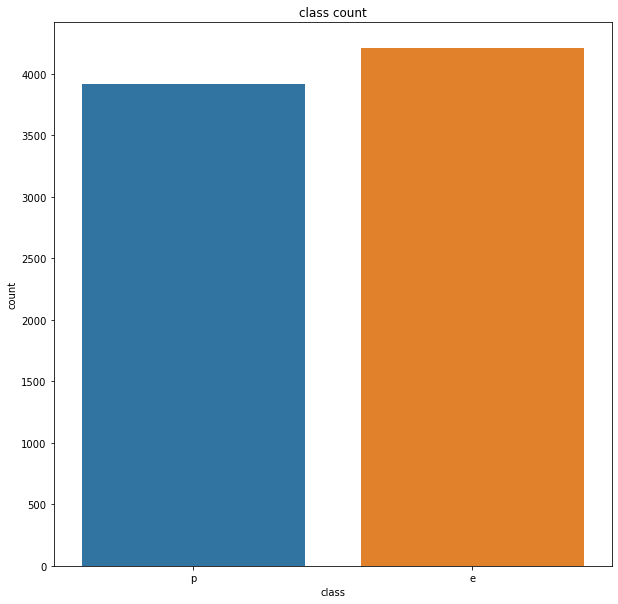

In [102]:
plt.figure(figsize=(10,10))
plt.title('class count')
sn.countplot(df['class'])

We see that the class is balanced

In [103]:
df = df.drop('veil-type', axis=1)
df.shape

(8124, 22)

In [104]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [105]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


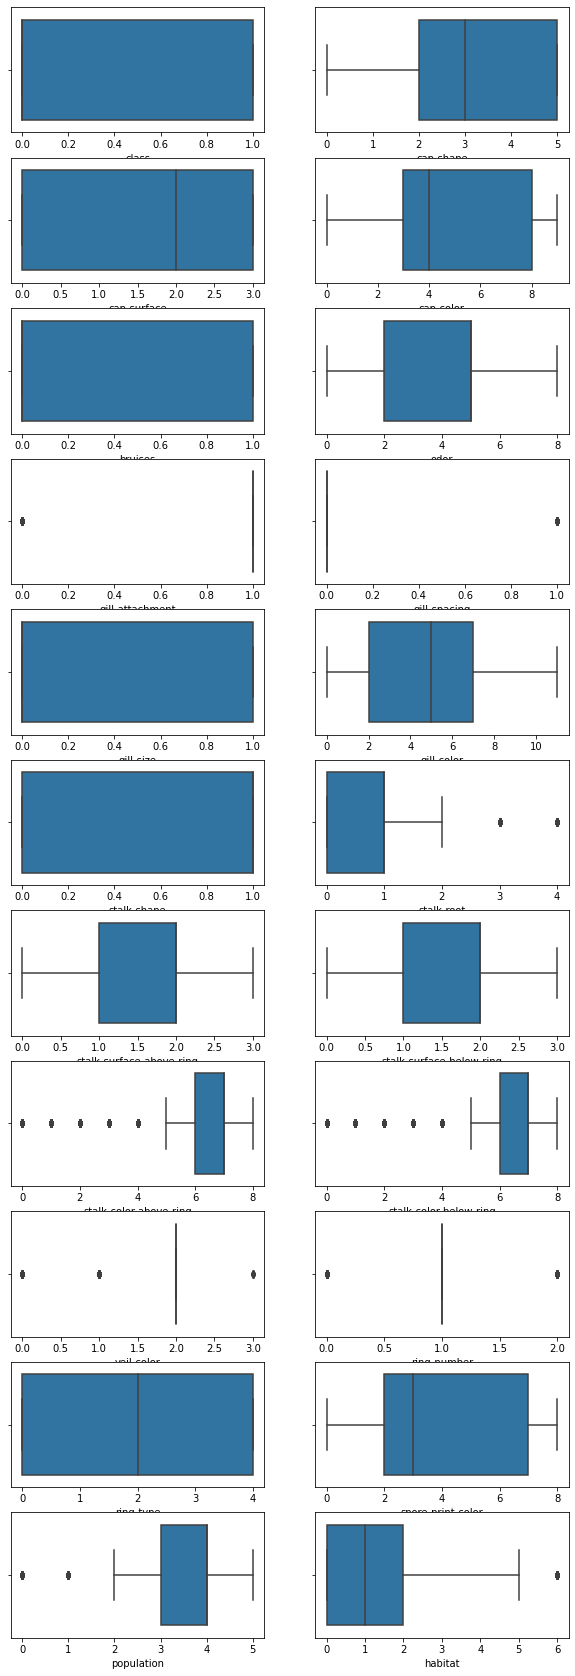

In [106]:
columns = ['class','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-color','ring-number','ring-type','spore-print-color','population','habitat']
fig,ax = plt.subplots(11,2,figsize=(10,30))
row = col = 0
for n,i in enumerate(columns):
    if (n%2 == 0) & (n > 0):
        row += 1
        col = 0
    sn.boxplot(df[i],ax=ax[row,col])
    col += 1

In [107]:
cor=df.corr()
cor

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.334593,-0.298801,-0.154003,-0.146730,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.030417,-0.032591,-0.031659,-0.030390,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.089090,0.107965,0.066050,0.068885,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.060837,-0.047710,0.002364,0.008057,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.460824,0.458983,0.083538,0.092874,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.118617,0.061820,0.174532,0.169407,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.088916,-0.116177,0.099299,0.097160,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.212359,-0.213775,0.274574,0.253505,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.056310,0.010894,0.296548,0.278708,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.224287,0.257224,-0.058299,-0.074781,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


<AxesSubplot:>

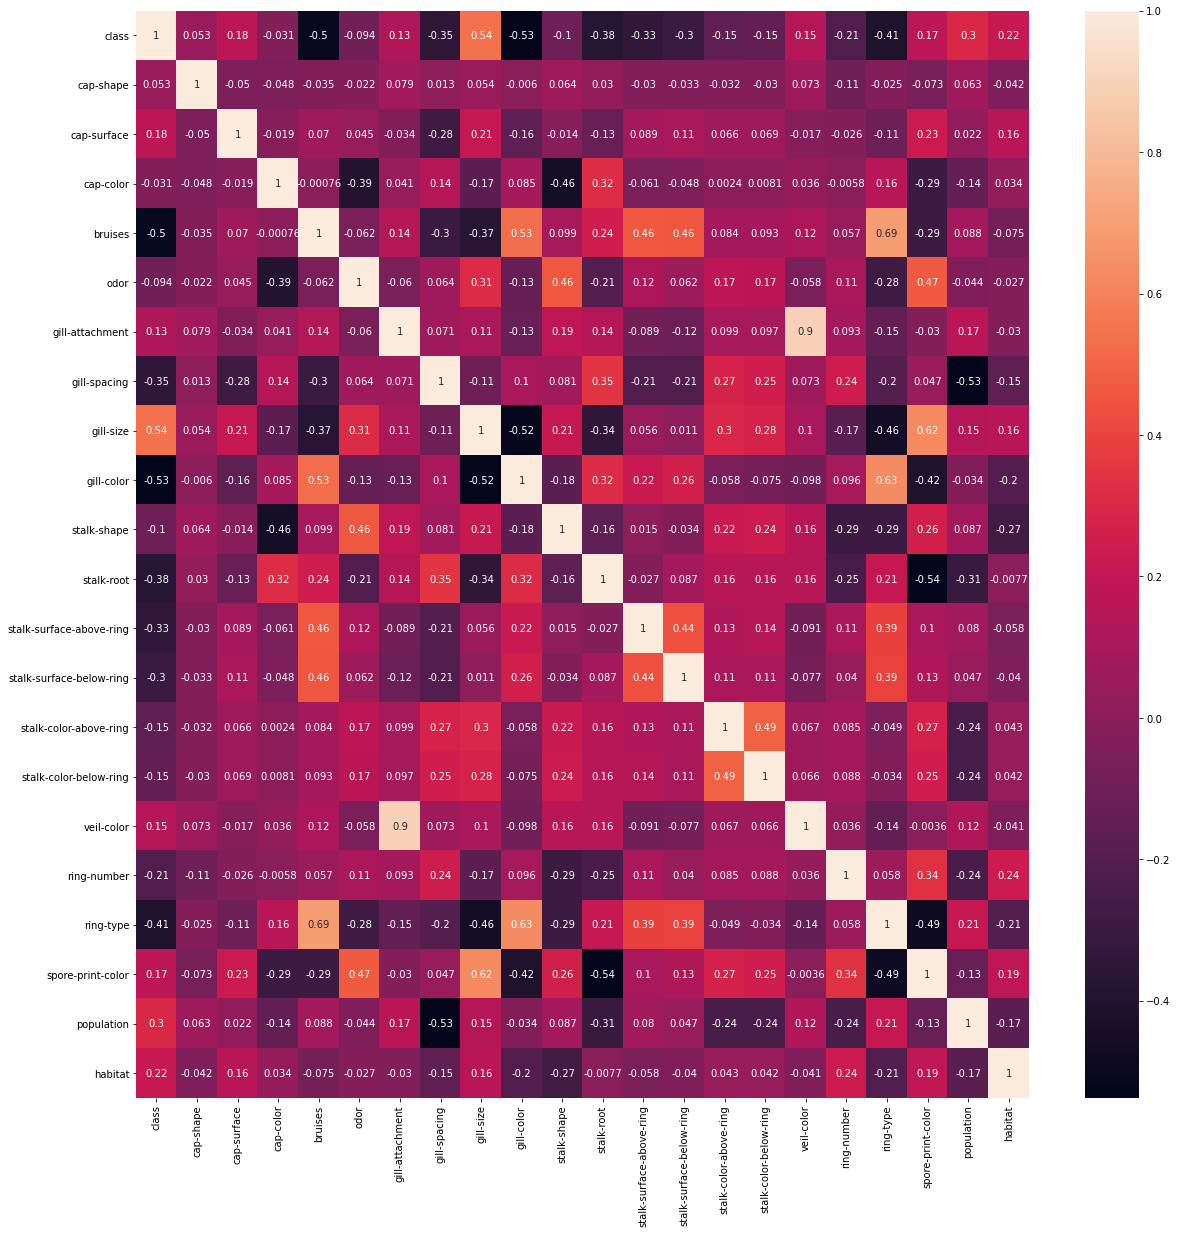

In [108]:
plt.figure(figsize=(20,20))
sn.heatmap(df.corr(),annot=True)

We see that odor and cap color are weakly co related to class

In [75]:
df.skew()

class                       0.071946
cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

All the columns are categorical, we do not have to check for the skewness or remove outliers.

Let us compare the different features count along with the target variable which is class.

<AxesSubplot:xlabel='habitat', ylabel='count'>

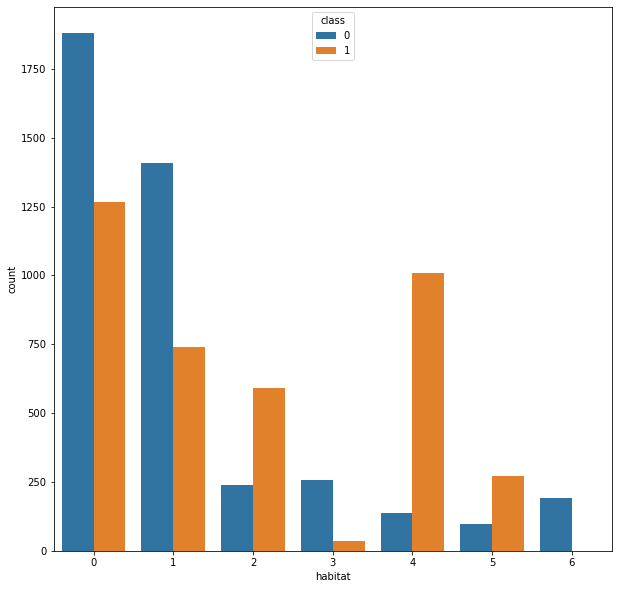

In [167]:
plt.figure(figsize=(10,10))
sn.countplot(data=df, x='habitat', hue='class')

<AxesSubplot:xlabel='cap-color', ylabel='count'>

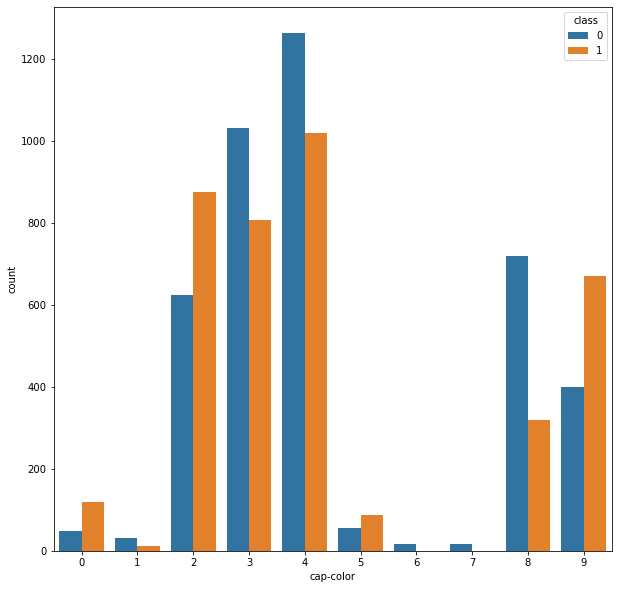

In [168]:
plt.figure(figsize=(10,10))
sn.countplot(data=df, x='cap-color', hue='class')

<AxesSubplot:xlabel='bruises', ylabel='count'>

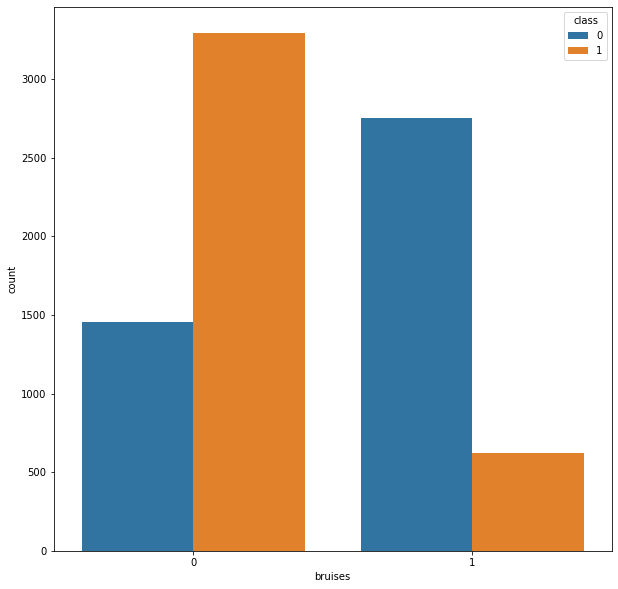

In [162]:
plt.figure(figsize=(10,10))
sn.countplot(data=df, x='bruises', hue='class')

<AxesSubplot:xlabel='odor', ylabel='count'>

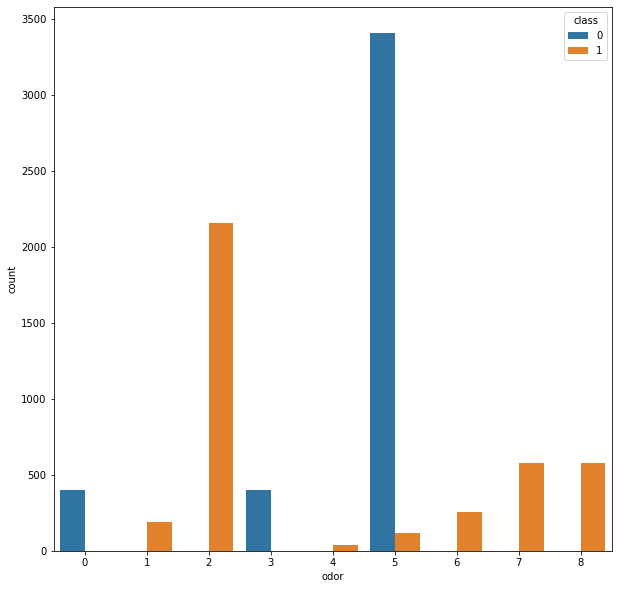

In [164]:
plt.figure(figsize=(10,10))
sn.countplot(data=df, x='odor', hue='class')

<AxesSubplot:xlabel='gill-spacing', ylabel='count'>

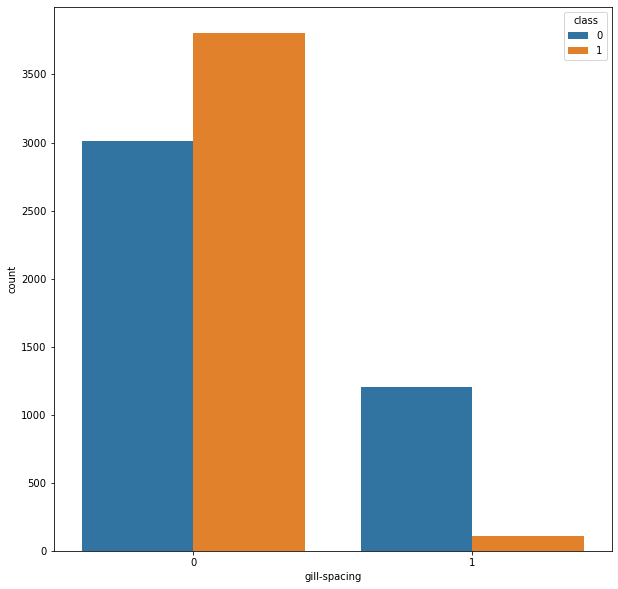

In [165]:
plt.figure(figsize=(10,10))
sn.countplot(data=df, x='gill-spacing', hue='class')

<AxesSubplot:xlabel='population', ylabel='count'>

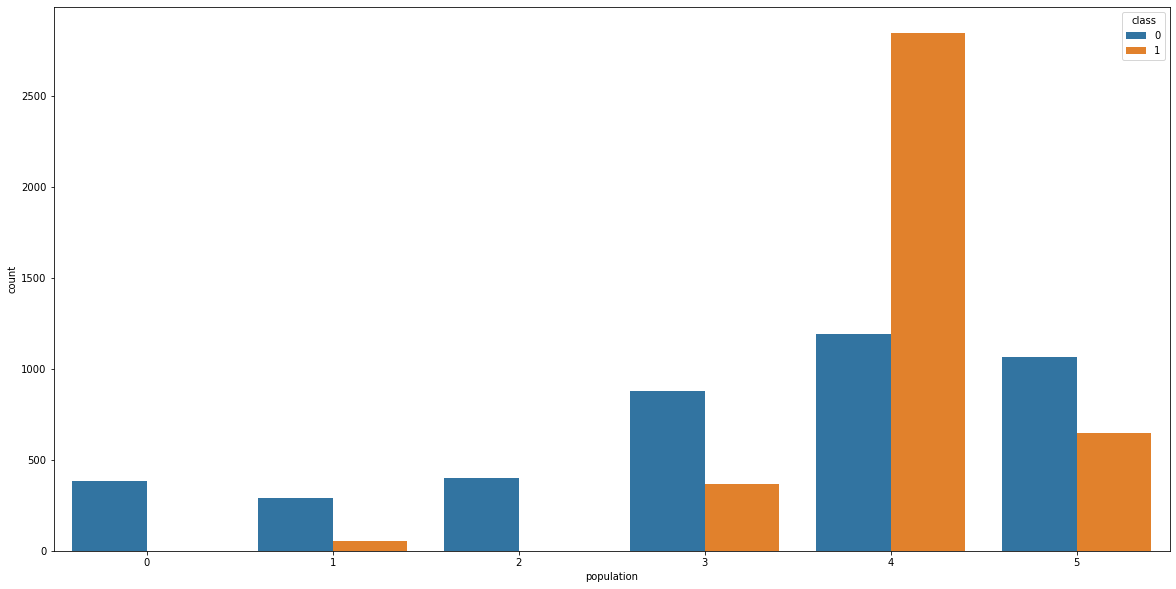

In [166]:
plt.figure(figsize=(20,10))
sn.countplot(data=df, x='population', hue='class')

Let us now split the dataset.

In [112]:
y = df['class']
x = df.drop('class',axis = 1)

In [113]:
x.shape

(8124, 21)

In [115]:
y.shape

(8124,)

In [116]:
x.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,2,7,7,2,1,0,3,0,1


In [117]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int32

As there is not much difference in the range of the of the feature varibles, I will not do any standardization.

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Finding the best random state


In [126]:
from sklearn.tree import DecisionTreeClassifier

maxaccu =0
maxrs = 0
for i in range(1,200):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=i)
    mod = DecisionTreeClassifier()
    mod.fit(xtrain,ytrain)
    pred = mod.predict(xtest)
    acc = accuracy_score(ytest,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxrs =i
print("Best accuracy is ",maxaccu,"on random state ",maxrs)

Best accuracy is  1.0 on random state  1


In [127]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=maxrs)

*MODEL BUILDING*

In [140]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [128]:
dtc = DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)
ypred = dtc.predict(xtest)
acc = classification_report(ytest,ypred)
print(acc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1020
           1       1.00      1.00      1.00      1011

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [129]:
rfc = RandomForestClassifier()
rfc.fit(xtrain,ytrain)
ypred = rfc.predict(xtest)
acc = classification_report(ytest,ypred)
print(acc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1020
           1       1.00      1.00      1.00      1011

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [130]:
sv = SVC()
sv.fit(xtrain,ytrain)
ypred = sv.predict(xtest)
acc = classification_report(ytest,ypred)
print(acc)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1020
           1       1.00      0.97      0.99      1011

    accuracy                           0.99      2031
   macro avg       0.99      0.99      0.99      2031
weighted avg       0.99      0.99      0.99      2031



In [133]:
knc = KNeighborsClassifier(n_neighbors=3)
knc.fit(xtrain,ytrain)
ypred = knc.predict(xtest)
acc = classification_report(ytest,ypred)
print(acc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1020
           1       1.00      1.00      1.00      1011

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [147]:
maxaccu =0
maxrs = 0
for i in range(1,200):
    mod = LogisticRegression(random_state=i)
    mod.fit(xtrain,ytrain)
    pred = mod.predict(xtest)
    acc = accuracy_score(ytest,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxrs =i
print("Best accuracy is ",maxaccu,"on random state ",maxrs)

Best accuracy is  0.9537173806006893 on random state  1


In [148]:
lr= LogisticRegression(random_state=1)
lr.fit(xtrain,ytrain)
ypred = lr.predict(xtest)
acc = classification_report(ytest,ypred)
print(acc)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1020
           1       0.96      0.94      0.95      1011

    accuracy                           0.95      2031
   macro avg       0.95      0.95      0.95      2031
weighted avg       0.95      0.95      0.95      2031



In [134]:
from sklearn.model_selection import cross_val_score

In [135]:
print(cross_val_score(dtc,x,y,cv=5).mean())

0.960113982569155


In [137]:
print(cross_val_score(rfc,x,y,cv=5).mean())

0.8907830996589616


In [138]:
print(cross_val_score(sv,x,y,cv=5).mean())

0.8420306934444864


In [139]:
print(cross_val_score(knc,x,y,cv=5).mean())

0.8890633573323228


In [149]:
print(cross_val_score(lr,x,y,cv=5).mean())

0.8392258431223949


Considering the differnce between accuracy and cv_score , we can see that the best model we have is DecisionTreeClassifier

Hyper parameter tuning

In [150]:
from sklearn.model_selection import GridSearchCV

In [154]:
parameter = { 'max_depth' : np.arange(2,50),
              'criterion':['gini', 'entropy'],
             'max_features':['auto', 'sqrt', 'log2'],
             'splitter' : ['best', 'random']
}

In [155]:
GCV = GridSearchCV(DecisionTreeClassifier(),parameter,cv=5)

In [156]:
GCV.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [157]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 11,
 'max_features': 'log2',
 'splitter': 'best'}

In [158]:
Final_mod = DecisionTreeClassifier(criterion= 'gini',max_depth=11,max_features='log2',splitter='best')
Final_mod.fit(xtrain,ytrain)
pred = Final_mod.predict(xtest)
acc = accuracy_score(ytest,pred)
print(acc*100)

99.60610536681438


Serialization

In [159]:
import joblib
joblib.dump(Final_mod,"MushroomsFinalModel.pkl")

['MushroomsFinalModel.pkl']